In [66]:
import pandas as pd
df = pd.read_csv('C:\\Users\\moham\\Downloads\\ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


              Price    Age_08_04             KM    Fuel_Type           HP  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749     1.868384   101.502089   
std     3626.964585    18.599988   37506.448872     0.371572    14.981080   
min     4350.000000     1.000000       1.000000     0.000000    69.000000   
25%     8450.000000    44.000000   43000.000000     2.000000    90.000000   
50%     9900.000000    61.000000   63389.500000     2.000000   110.000000   
75%    11950.000000    70.000000   87020.750000     2.000000   110.000000   
max    32500.000000    80.000000  243000.000000     2.000000   192.000000   

         Automatic           cc        Doors  Cylinders        Gears  \
count  1436.000000   1436.00000  1436.000000     1436.0  1436.000000   
mean      0.055710   1576.85585     4.033426        4.0     5.026462   
std       0.229441    424.38677     0.952677        0.0     0.188510   
min       0.000000

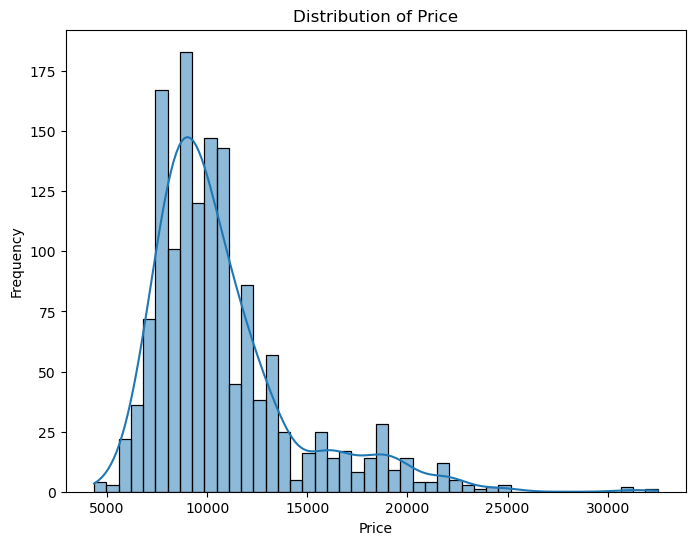

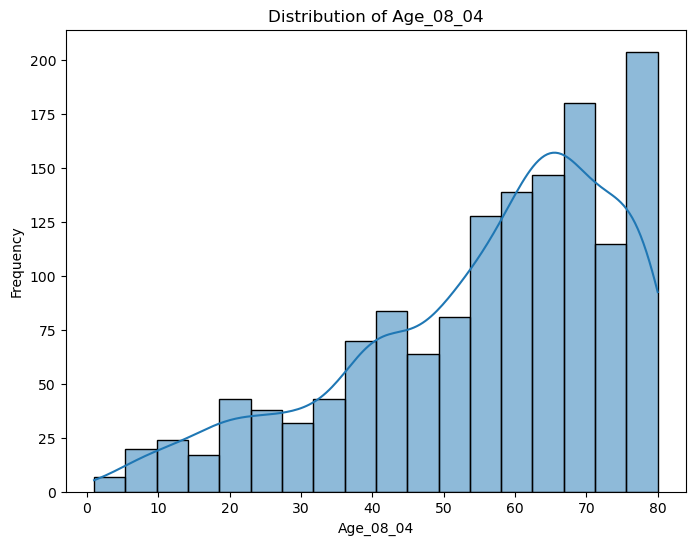

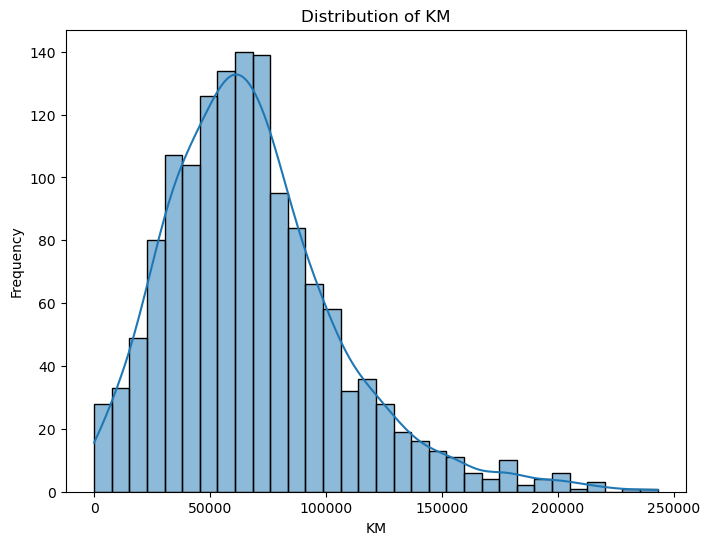

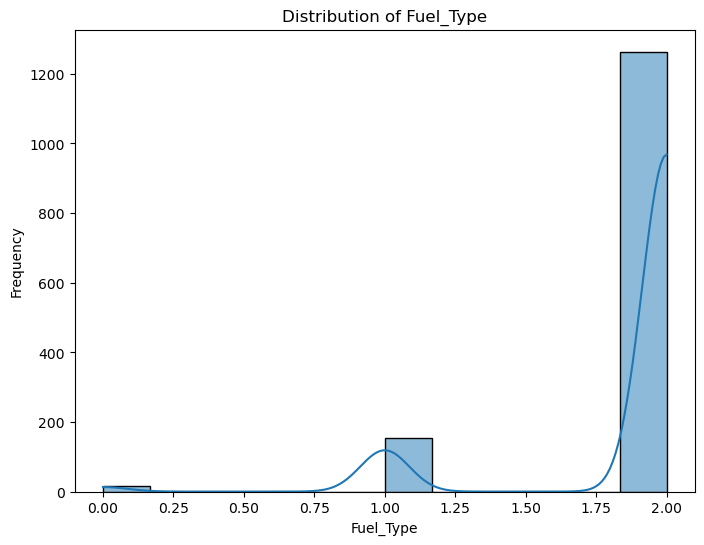

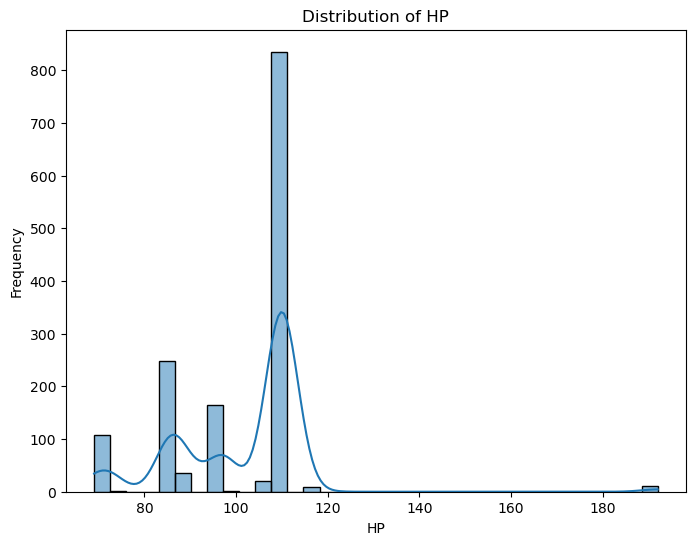

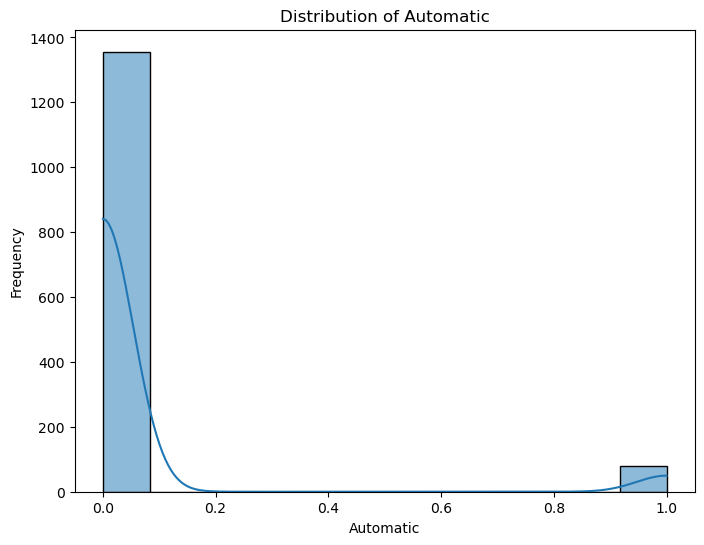

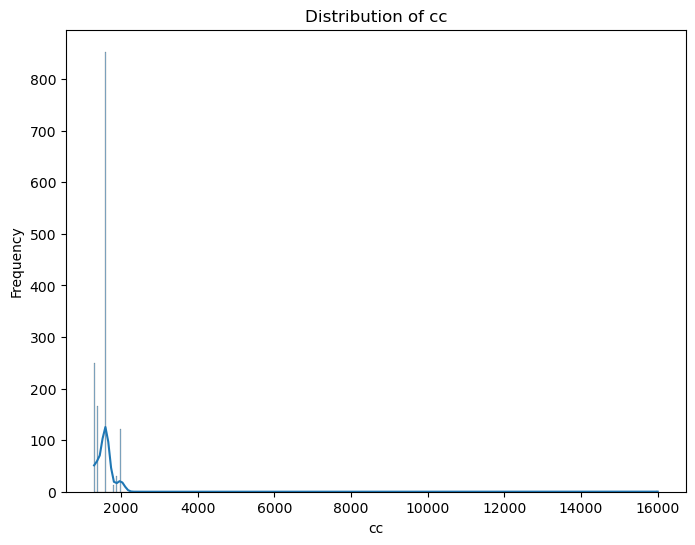

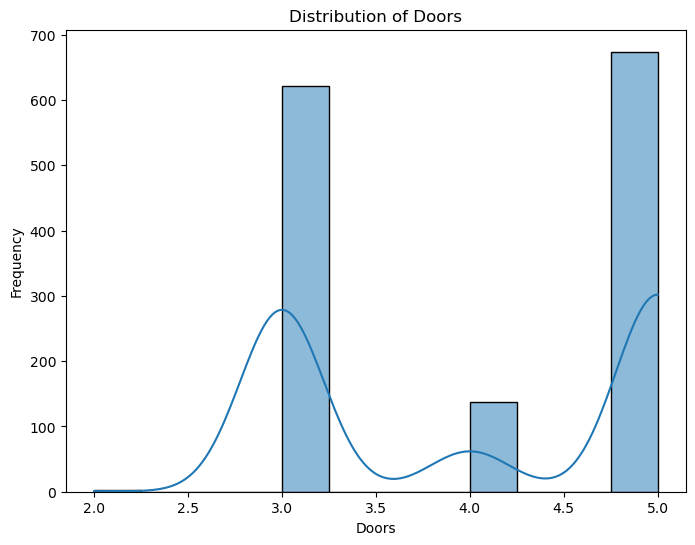

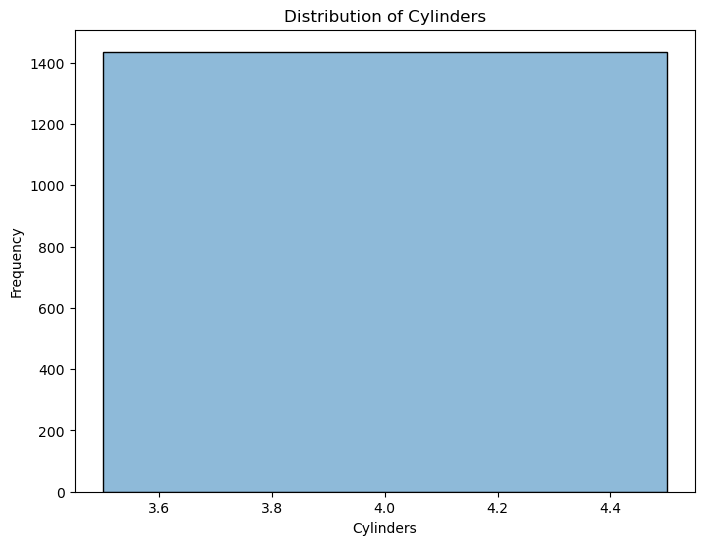

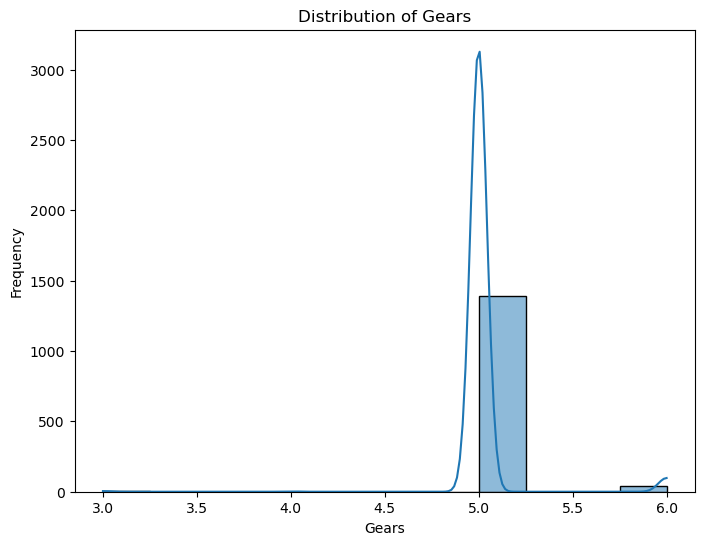

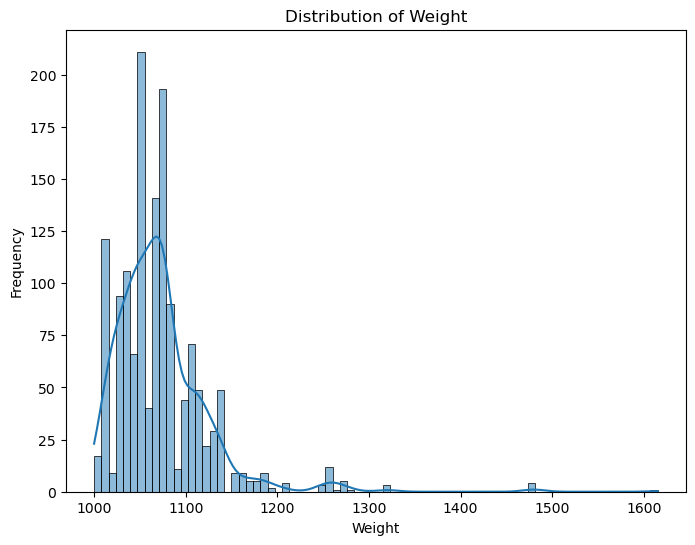

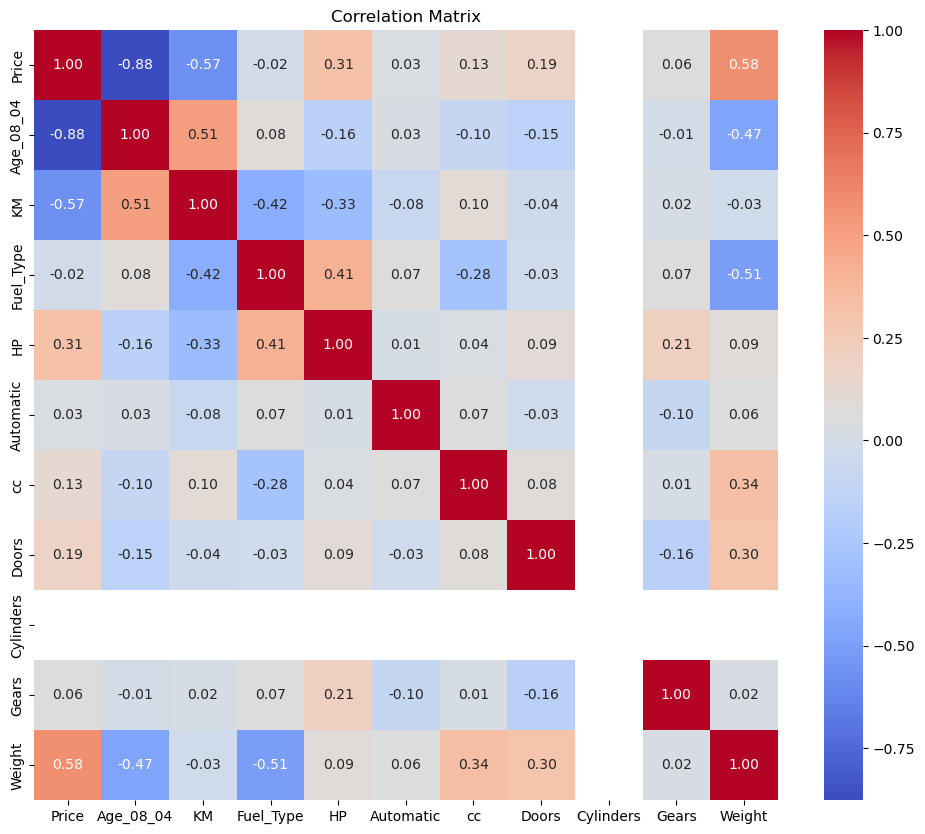

In [74]:
# prompt: Perform exploratory data analysis (EDA) to gain insights into the dataset. Pre process the data to apply the MLR.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\moham\\Downloads\\ToyotaCorolla - MLR.csv")

# EDA: Summary Statistics
print(df.describe())

# EDA: Data types and missing values
print(df.info())

# EDA: Distribution of target variable (Price)

import pandas as pd
import matplotlib.pyplot as plt
# Summary statistics for all variables
print(df.describe())

# Distribution of each numerical variable
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# EDA: Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Data Preprocessing for MLR

# 1. Handling Categorical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

In [26]:
# Data preprocessing for MLR

# Separate features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Now X and Y are ready for the MLR model.


In [28]:

# Split the dataset into training and testing sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# 1. A multiple linear regression model using the training dataset. 
# 2 Interpret the coefficients of the model. 
# 3 Build minimum of 3 different models.

# Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_model1 = model1.predict(X_test)

# Evaluate the model
mse_model1 = mean_squared_error(y_test, y_pred_model1)
r2_model1 = r2_score(y_test, y_pred_model1)

print("Model 1 (All Features):")
print("Mean Squared Error:", mse_model1)
print("R-squared:", r2_model1)
print("Coefficients:", model1.coef_)


# Model 2: Using only highly correlated features
#  Identify highly correlated features (e.g., |correlation| > 0.5) with 'Price'
#  Based on the correlation matrix generated earlier.
highly_correlated_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears']  # Replace with your selected features
X_train_model2 = X_train[:, [df.columns.get_loc(col) for col in highly_correlated_features]]
X_test_model2 = X_test[:, [df.columns.get_loc(col) for col in highly_correlated_features]]

model2 = LinearRegression()
model2.fit(X_train_model2, y_train)
y_pred_model2 = model2.predict(X_test_model2)
mse_model2 = mean_squared_error(y_test, y_pred_model2)
r2_model2 = r2_score(y_test, y_pred_model2)

print("\nModel 2 (Highly Correlated Features):")
print("Mean Squared Error:", mse_model2)
print("R-squared:", r2_model2)
print("Coefficients:", model2.coef_)


# Model 3: Using features with specific domain knowledge
# Select features based on domain knowledge that you believe are important predictors
# for the price of the car (e.g., Engine size, Fuel efficiency, etc).
# For example:
domain_knowledge_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Gears']  # Replace with your
# selected features

X_train_model3 = X_train[:, [df.columns.get_loc(col) for col in domain_knowledge_features]]
X_test_model3 = X_test[:, [df.columns.get_loc(col) for col in domain_knowledge_features]]

model3 = LinearRegression()
model3.fit(X_train_model3, y_train)
y_pred_model3 = model3.predict(X_test_model3)
mse_model3 = mean_squared_error(y_test, y_pred_model3)
r2_model3 = r2_score(y_test, y_pred_model3)

print("\nModel 3 (Domain Knowledge Features):")
print("Mean Squared Error:", mse_model3)
print("R-squared:", r2_model3)
print("Coefficients:", model3.coef_)



Model 1 (All Features):
Mean Squared Error: 2096851.140017702
R-squared: 0.8428476112018004
Coefficients: [-2.25792605e+03 -6.34972882e+02  3.20204724e+02  3.09375607e+02
  5.62387109e+01 -3.11880931e+01 -3.45507351e+01  1.13686838e-13
  9.99288903e+01  1.23719557e+03]

Model 2 (Highly Correlated Features):
Mean Squared Error: 5548627.75452854
R-squared: 0.5841478255014377
Coefficients: [-1877.10209294   358.27024816  -205.9887048    -78.44207807
     0.          2398.35902166]

Model 3 (Domain Knowledge Features):
Mean Squared Error: 5548627.7545285355
R-squared: 0.5841478255014381
Coefficients: [-1877.10209294   358.27024816  -205.9887048    -78.44207807
  2398.35902166]


In [70]:
# Apply Lasso and Ridge methods on the model.

from sklearn.linear_model import Lasso, Ridge

# Model 4: Lasso Regression
model4 = Lasso(alpha=0.8)  # we can adjust the alpha value
model4.fit(X_train, y_train)
y_pred_model4 = model4.predict(X_test)
mse_model4 = mean_squared_error(y_test, y_pred_model4)
r2_model4 = r2_score(y_test, y_pred_model4)

print("\nModel 4 (Lasso Regression):")
print("Mean Squared Error:", mse_model4)
print("R-squared:", r2_model4)
print("Coefficients:", model4.coef_)


# Model 5: Ridge Regression
model5 = Ridge(alpha=0.8)  # we can adjust the alpha value
model5.fit(X_train, y_train)
y_pred_model5 = model5.predict(X_test)
mse_model5 = mean_squared_error(y_test, y_pred_model5)
r2_model5 = r2_score(y_test, y_pred_model5)

print("\nModel 5 (Ridge Regression):")
print("Mean Squared Error:", mse_model5)
print("R-squared:", r2_model5)
print("Coefficients:", model5.coef_)


Model 4 (Lasso Regression):
Mean Squared Error: 2095820.6532967251
R-squared: 0.8429248429359639
Coefficients: [-2257.6395377   -635.14716503   318.73071487   309.28264023
    55.55656359   -30.22114052   -33.32197407     0.
    99.46849341  1234.97170585]

Model 5 (Ridge Regression):
Mean Squared Error: 2096228.0027764263
R-squared: 0.8428943133754295
Coefficients: [-2256.11936262  -635.94942806   318.96784168   309.62382202
    56.20538462   -30.97079576   -34.09183012     0.
    99.99346269  1236.21581659]


In [ ]:
#INTERVIEW QUESTION====

In [ ]:
# 1 .What is Normalization & Standardization and how is it helpful?
#ANSWER:Normalization transforms the data to fit within a specific range, usually between 0 and 1, 
#without changing the distribution shape of the data. It is typically used when features have different scales or units.

##Use Cases:
#When the features have varying scales.
#When you know that the data is not normally distributed (e.g., when working with neural networks).
#Useful when working with distance-based algorithms (e.g., KNN, SVM, or K-Means) where the absolute range of the values affects the outcome.
#Example:
#If a dataset contains age (in years) and income (in thousands), the income values may dominate the calculations. Normalization scales them both to the range [0, 1], ensuring both features contribute equally to the analysis.


In [ ]:
#2.What techniques can be used to address multicollinearity in multiple linear regression?

#ANSWER:Standardization (or Z-score normalization) transforms data so that it has a mean of 0 and a standard deviation of 1. Unlike normalization, 
#it doesn’t bound data within a specific range, but centers the data around zero.
#Use Cases:
#When data is normally distributed or close to normally distributed.
#Helpful for algorithms that assume a Gaussian distribution (e.g., linear regression, logistic regression, SVM, etc.).
#Applied when the range of values is unknown or very large.
#Example:
#Suppose a dataset contains exam scores from different subjects, where one subject has a higher average score than the others. 
#Standardization brings all the subjects' scores to a common scale where they have the same mean and variance.